# Ensemble Techniques
- Ensemble techniques refer to the use of multiple machine learning models to improve predictive performance and achieve better results than individual models
- Rather than relying on a single model, ensemble methods combine predictions from various models to enhance overall accuracy and robustness

## Dataset

In [1]:
# Sklearn datasets are included as part of the scikit-learn (sklearn) library, so they come pre-installed with the library. 
# Due to this, we can easily access and load these datasets, without having to download them separately.

# Here, we load the Iris dataset
# This is a popular dataset often used for practicing and demonstrating machine learning and classification algorithms
from sklearn.datasets import load_iris

# imports the numpy and pandas libraries
import pandas as pd
import numpy as np

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# The load_iris function is called to load the Iris dataset
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# creates a Pandas DataFrame named iris_df using the Iris dataset's feature_names 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# A new column named "target" is added to the iris_df DataFrame. The values for this column are taken from iris.target
iris_df["target"] = iris.target

# Display the dataframe
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Determine the shape or dimensions of the Pandas DataFrame iris_df
iris_df.shape

(150, 5)

In [6]:
# Retrieve and display the column names of the Pandas DataFrame iris_df
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [7]:
# Obtain a concise summary of the information about the Pandas DataFrame iris_df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# Obtain a statistical summary of the numerical columns in a Pandas DataFrame iris_df while excluding the last (target) column
iris_df.iloc[:,:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Count the number of missing (null) values in each column of the Pandas DataFrame iris_df
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

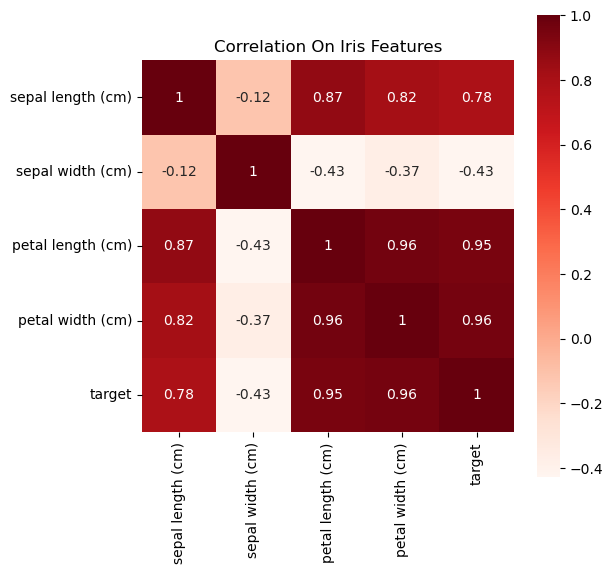

In [10]:
# Check the correlation between the columns
# Create a new figure for the heatmap 
plt.figure(figsize = (6,6))

# Generate the heatmap visualization
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# square=True: This parameter ensures that the heatmap cells are square
# cmap="Reds": This parameter sets the color map to "Reds".
sb.heatmap(iris_df.corr(), annot=True, square=True, cmap="Reds")
plt.title('Correlation On Iris Features')
plt.show()

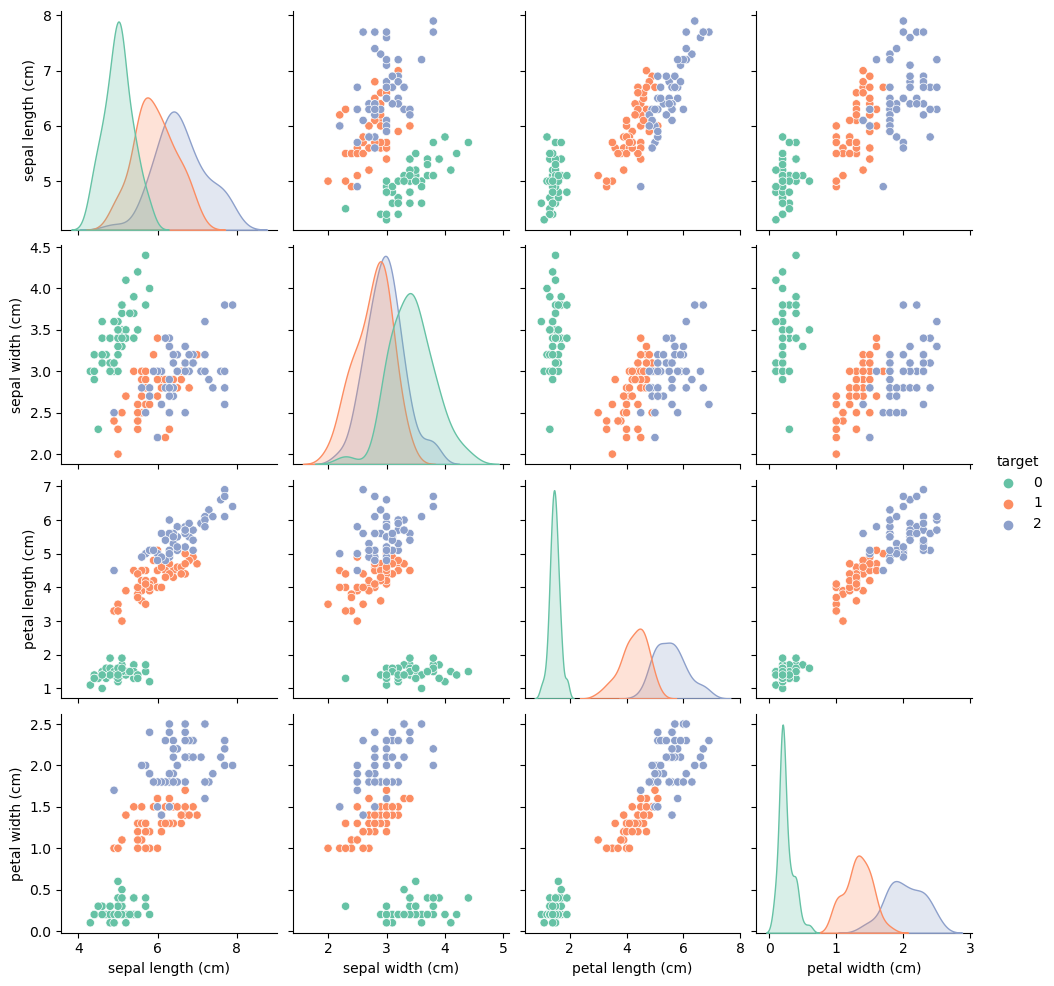

In [11]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sb.pairplot(data=iris_df, hue='target', palette='Set2')
plt.show()

## Modelling

In [12]:
# Import the train_test_split function from the sklearn.model_selection module 
# The train_test_split function is used to split a dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
# new variable X is created to store the feature variables for your machine learning model
X = iris_df.drop(["target"], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# A new variable y is created to store the target variable (class labels) for your machine learning model
y = iris_df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [16]:
# n_features: This variable is assigned the number of features in our dataset. 
# n_classes: This variable is assigned an array containing the unique classes or labels found in our target variable y
n_features, n_classes = X.shape[1], np.unique(y)

n_features, n_classes

(4, array([0, 1, 2]))

In [17]:
# train_test_split is used to split features X and target variable y into training and testing sets
# test_size parameter specifies the proportion of the data allocated for the testing set, which is set to 20% in this case.
# X_train: This variable contains the feature data for the training set.
# X_test: This variable contains the feature data for the testing set.
# y_train: This variable contains the target labels for the training set.
# y_test: This variable contains the target labels for the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


### Voting

In [18]:
# Imports three different machine learning classifiers—KNeighborsClassifier, LogisticRegression, and SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

#### Hard Voting

In [19]:
# Instantiate three different classifiers for voting
log = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=25)
svm = SVC(gamma='scale', random_state=42)

# Create a Voting Classifier using hard voting
hv = VotingClassifier(
    estimators=[('log', log), ('knn', knn), ('svm', svm)],
    voting='hard'
)

# Evaluate and display the accuracy of each individual classifier and the Voting Classifier
# __class__ refers to the class of object in interest. __name__ is the name of the class
for clf in (log, knn, svm, hv):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__} accuracy:', accuracy_score(y_test, y_pred))

LogisticRegression accuracy: 0.9666666666666667
KNeighborsClassifier accuracy: 0.9333333333333333
SVC accuracy: 0.9666666666666667
VotingClassifier accuracy: 0.9666666666666667


#### Soft Voting

In [20]:
# Instantiate three different classifiers for voting
# Ensure all classifiers involved can predict_proba
log = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=25)
svm = SVC(gamma='scale', random_state=42, probability=True)

# Create a Voting Classifier using soft voting
sv = VotingClassifier(
    estimators=[('log', log), ('knn', knn), ('svm', svm)],
    voting='soft'
)

# Evaluate and display the accuracy of each individual classifier and the Voting Classifier
# __class__ refers to the class of object in interest. __name__ is the name of the class
for clf in (log, knn, svm, sv):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__} accuracy:', accuracy_score(y_test, y_pred))

LogisticRegression accuracy: 0.9666666666666667
KNeighborsClassifier accuracy: 0.9333333333333333
SVC accuracy: 0.9666666666666667
VotingClassifier accuracy: 0.9666666666666667


### Random Forest

In [21]:
# A random forest model for regression tasks
from sklearn.ensemble import RandomForestRegressor

# A random forest model for classification tasks
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Instantiate the RandomForestClassifier
# n_estimators is a hyperparameter that specifies the number of decision trees in the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data
rf.fit(X_train, y_train)

# Make predictions on new data
rf_pred = rf.predict(X_test)

# Display the accuracy
print(accuracy_score(y_test, rf_pred))

0.9


### Bagging

In [23]:
# We can introduce diversity by randomizing the splitting of trees
# Why have an abundance of identical trees? 
#   It is crucial to infuse variety! 
#   Much like the Earth benefiting from more trees, our machine learning processes is also better with increased tree diversity!

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating a BaggingClassifier with a base DecisionTreeClassifier
# max_leaf_nodes=20: The max_leaf_nodes parameter sets an upper limit on the number of leaf nodes in the decision tree
# splitter='random': The splitter parameter determines the strategy used to choose the split at each node 
#   When set to 'random', it means that the decision tree will randomly select features to consider when making a split at each node
# max_samples: It defines the maximum number of samples to be drawn from the training dataset to train each base estimator
#   Here, each tree is trained on a subset of 100 samples randomly drawn from the training set
# bootstrap: If True, the subsets used to train each base estimator are sampled with replacement

bagged_dt = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=20,
                           random_state=42,
                           splitter='random'),
    n_estimators=1000,
    max_samples=100,
    bootstrap=True,
    random_state=42
)

# Training the BaggingClassifier on the training data
bagged_dt.fit(X_train, y_train)

# Making predictions on the test data
bagged_dt_pred = bagged_dt.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, bagged_dt_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


### Boosting

#### AdaBoost

In [24]:
# AdaBoostClassifier is a machine learning ensemble method that belongs to the boosting family
# It stands for Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

In [25]:
# n_estimators=50: This parameter specifies the number of weak learners (base classifiers) 
#   that will be combined to form the final strong classifier
# learning_rate=0.2: The learning rate is a hyperparameter that scales the contribution of each weak learner
#   A smaller learning rate typically requires more weak learners to achieve the same level of accuracy 
#   but can improve generalization
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

# Fit the AdaBoost classifier to the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
ada_pred = ada.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


#### XGBoost

In [26]:
# XGBoost, short for eXtreme Gradient Boosting
#   It is a popular and powerful machine learning algorithm that belongs to the family of gradient boosting algorithms
# To install using anaconda
#   conda install -c conda-forge xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [27]:
# Create an XGBoost classifier with 90 base learners (trees) and a learning rate of 0.05
xg = XGBClassifier(n_estimators=90, learning_rate=0.05, early_stopping_rounds=3)

# Train the XGBoost classifier on the training data with early stopping based on the test set
# If the performance on the test set does not improve for 3 consecutive rounds, training stops
#   We can set the early stopping criterion to avoid overfitting 
# The evaluation results are not displayed during training to avoid verbosity
xg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Assess the accuracy of the trained XGBoost classifier on the test set
score_xgb = xg.score(X_test, y_test)

# Display the accuracy score achieved by the XGBoost classifier
print(score_xgb)

0.9666666666666667


### Stacking

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# You can define more complex meta-classifier (SVM with RBF kernel)
# complex_meta_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

# Create StackingClassifier
# estimators: This is the list of base classifiers (base_classifiers). 
#   These classifiers will be trained independently on the data.
# final_estimator: Meta-classifier that will be trained on the predictions of base classifiers to make final prediction
# cv=10: This parameter specifies the number of folds for cross-validation during training
#   In this case, 10-fold cross-validation is used
stk = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=10)

# Train StackingClassifier
stk.fit(X_train, y_train)

# Make predictions on the test set
stk_pred = stk.predict(X_test)

# Evaluate the accuracy of the StackingClassifier
accuracy = accuracy_score(y_test, stk_pred)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy: 0.9666666666666667
